In [1]:
import sqlite3

In [2]:
connection=sqlite3.connect("mydb.db")

In [3]:
connection

In [4]:
table_create_query = """
create table if not exists employee (
employee_id integer primary key autoincrement,
first_name text not null,
last_name text not null,
email text not null unique,
phone text not null unique,
salary real not null,
hire_date text not null
)
"""

In [5]:
table_create_query2 = """
create table if not exists customers (
customer_id integer primary key autoincrement,
first_name text not null,
last_name text not null,
email text not null unique,
phone text not null unique
)
"""

In [6]:
table_create_query3 = """
create table if not exists orders (
order_id integer primary key autoincrement,
customer_id integer not null,
order_date text not null,
amount real not null,
foreign key (customer_id) references customers(customer_id)
)
"""

In [7]:
cursor=connection.cursor()

In [8]:
cursor.execute(table_create_query)
cursor.execute(table_create_query2)
cursor.execute(table_create_query3)

In [9]:
insert_employee_query = """
insert into employee (first_name, last_name, email, phone, salary, hire_date) values (?, ?, ?, ?, ?, ?)
"""

insert_customer_query = """
insert into customers (first_name, last_name, email, phone) values (?, ?, ?, ?)
"""
insert_order_query = """
insert into orders (order_id, customer_id, order_date, amount) values (?, ?, ?, ?)
"""

In [10]:
employee_data = [
    ('adarsh', 'cv', 'adarsh.cv@example.com', '123-456-7890', 60000, '2020-01-15'),
    ('mithun', 'm', 'mithun.m@example.com', '987-654-3210', 75000, '2019-03-22'),
    ('darshan', 'naik', 'darshan.n@example.com', '555-123-4567', 80000, '2021-07-30'),
    ('kumar', 'gowda', 'kumar.g@example.com', '444-987-6543', 50000, '2022-11-05')
]

customer_data = [
    ('JOHN', 'DOE', 'john.doe@example.com', '123-456-7890'),
    ('JANE', 'SMITH', 'jane.smith@example.com', '987-654-3210'),
    ('ALICE', 'JOHNSON', 'alice.johnson@example.com', '555-123-4567'),
    ('BOB', 'BROWN', 'bob.brown@example.com', '444-987-6543')
]
order_data = [
    (1, 1, '2023-01-01', 100.50),
    (2, 2, '2023-02-15', 200.75),
    (3, 3, '2023-03-10', 150.00),
    (4, 4, '2023-04-20', 300.25)
]

In [11]:
cursor.executemany(insert_employee_query, employee_data)
cursor.executemany(insert_customer_query, customer_data)
cursor.executemany(insert_order_query, order_data)

In [12]:
connection.commit()

In [13]:
cursor.execute("select * from orders;")
for row in cursor.fetchall():
    print(row)

(1, 1, '2023-01-01', 100.5)
(2, 2, '2023-02-15', 200.75)
(3, 3, '2023-03-10', 150.0)
(4, 4, '2023-04-20', 300.25)


In [14]:
from langchain_community.utilities import SQLDatabase
db = SQLDatabase.from_uri("sqlite:///mydb.db")

In [15]:
db

In [16]:
db.dialect

'sqlite'

In [17]:
db.get_usable_table_names()

['customers', 'employee', 'orders']

In [18]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama3-70b-8192")

In [19]:
llm.invoke("How are YOU?")

AIMessage(content="I'm just a language model, I don't have emotions or feelings. I'm just here to provide information and assist with your questions to the best of my abilities.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 14, 'total_tokens': 49, 'completion_time': 0.111826681, 'prompt_time': 0.000180847, 'queue_time': 0.054225272000000005, 'total_time': 0.112007528}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--4b884d61-183b-4ba2-8408-26cd5bf7c995-0', usage_metadata={'input_tokens': 14, 'output_tokens': 35, 'total_tokens': 49})

In [20]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [21]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)

In [22]:
toolkit.get_tools()

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000246294D64E0>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000246294D64E0>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000246294D64E0>),
 QuerySQLCheckerTool(description='Use this tool to 

In [23]:
for tool in toolkit.get_tools():
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [24]:
list_tables_tools = next((tool for tool in toolkit.get_tools() if tool.name == "sql_db_list_tables"), None)

In [25]:
list_tables_tools

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000246294D64E0>)

In [26]:
get_schema_tool = next((tool for tool in toolkit.get_tools() if tool.name == "sql_db_schema"), None)

In [27]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000246294D64E0>)

In [28]:
list_tables_tools.invoke({})

'customers, employee, orders'

In [29]:
print(get_schema_tool.invoke("orders"))


CREATE TABLE orders (
	order_id INTEGER, 
	customer_id INTEGER NOT NULL, 
	order_date TEXT NOT NULL, 
	amount REAL NOT NULL, 
	PRIMARY KEY (order_id), 
	FOREIGN KEY(customer_id) REFERENCES customers (customer_id)
)

/*
3 rows from orders table:
order_id	customer_id	order_date	amount
1	1	2023-01-01	100.5
2	2	2023-02-15	200.75
3	3	2023-03-10	150.0
*/


In [30]:
from langchain_core.tools import tool

@tool
def db_query_tool(query: str) -> str:
    """Execute a SQL query on the database and return the result.
    If the query fails, return an error message.
    In case of error message , user will rewrite the query and try again."""
    result = db.run_no_throw(query)
    if not result:
        return "Error executing query. Please check the query syntax and try again."
    return result

In [31]:
print(db_query_tool.invoke("SELECT * FROM orders WHERE amount > 200"))
print(db_query_tool.invoke("SELECT * FROM employee WHERE salary > 60000"))

[(2, 2, '2023-02-15', 200.75), (4, 4, '2023-04-20', 300.25)]
[(2, 'mithun', 'm', 'mithun.m@example.com', '987-654-3210', 75000.0, '2019-03-22'), (3, 'darshan', 'naik', 'darshan.n@example.com', '555-123-4567', 80000.0, '2021-07-30')]


## Query Check

## Query Generation

In [32]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [33]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda,RunnableWithFallbacks
from langgraph.prebuilt import ToolNode


In [34]:
from langchain_core.prompts import ChatPromptTemplate


query_check_system="""You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
-Using NOT IN with null values
-Using union when union all should have been used
-using between for exclusive ranges
-Data type mismatch in predicates
-Properly quoting identifiers
-Using the correct number of arguments for functions
-Casting to the correct data type
-Using the proper columns for joins

If there are any of the  above mistakes, rewrite the query to fix the mistakes.If the query is correct, return the query as is.

You will call the appropriate tool to execute the query after running this check.
"""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system),("placeholder", "{messages}")])

query_check = query_check_prompt | llm.bind_tools([db_query_tool])



In [35]:
query_check.invoke({"messages":[('user', 'SELECT * FROM orders WHERE amount > 200')]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_feet', 'function': {'arguments': '{"query":"SELECT * FROM orders WHERE amount \\u003e 200"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 2123, 'total_tokens': 2198, 'completion_time': 0.219412453, 'prompt_time': 0.077264311, 'queue_time': -0.32817723099999996, 'total_time': 0.296676764}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--24f3c41e-d8d6-460e-8b11-92474d285e48-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM orders WHERE amount > 200'}, 'id': 'call_feet', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2123, 'output_tokens': 75, 'total_tokens': 2198})

In [36]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query result."""
    final_answer: str = Field(description="The final answer to submit to the user.")


# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query that answers the question.Then look at the results of the query and return the final answer to the user.

Do not call any tool besides SubmitFinalAnswer to submit the final answer.

when generating the query:

Output the SQL query that answers the input question without any tool calls.

Unless the user specifies a specific number of examples they with to obtain , always limit your query to at most results.
You can order the results by a relevant column to return the most intresting examples in the database.
Never query for all the columns from specific table, only ask for the columns that are relevant to the question.

If you get an error while executing the query, rewrite the query to fix the error and try again.

If you get an empty result set, you should try to rewrite the query to get a non-empty result set.
Never make stuff up, if you don't have enough information to answer the query... just say you don't have enough information to answer the query.

If you have enough information to answer the input question,simply invoke the appropriate tool to submit the final answer to the user.

Do not use any DML statements like( INSERT, UPDATE, DELETE,DROP etc.) to the database.Do not return any sql query except the answer
"""

query_gen_prompt = ChatPromptTemplate.from_messages([
    ("system", query_gen_system),
    ("placeholder", "{messages}")
])

query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])

In [37]:
class State(TypedDict):

    messages: Annotated[list[AnyMessage], add_messages]

In [38]:
def first_tool_call(state: State) -> dict[str,list[AIMessage]]:
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables", "args":{},"id": "tool-1"}])]}


In [39]:
def handle_tool_error(state: State):
    error=state.get("error")
    tool_calls=state["messages"][-1].tool_calls 
    return {
        "messages": [
        ToolMessage(content=f"Error executing tool {tool_calls[0].name}: {error}", tool_calls=tool_calls, tool_call_id=tc["id"])
        for tc in tool_calls
        ]
    }


In [40]:
def create_tool_node_with_fallbacks(tools:list)-> RunnableWithFallbacks[Any,dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)],exception_key="error")

In [51]:
def model_check_query(state: State):
    return {"message":[query_check.invoke({"messages":[ state["messages"][-1]]})]}


In [52]:
def query_gen_node(state: State):
    message = query_gen.invoke(state)

    # Sometimes the LLM will hallucinate and call the wrong tool.We need to catch that and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc['name'] != "SubmitFinalAnswer":
                tool_messages.append(ToolMessage(content=f"Error: LLM called the wrong tool {tc['name']}.", tool_calls=[tc], tool_call_id=tc['id']))
    else:
        tool_messages=[]
    return {
        "messages": [message] + tool_messages
    }

In [53]:
def should_continue(state: State):
    messages = state["messages"]
    last_message = messages[-1] 
    if getattr(last_message, 'tool_calls', None):
        # If the last message is a tool call, we need to check if it was successful
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [54]:
workflow = StateGraph(State)

In [55]:
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_table_tool",create_tool_node_with_fallbacks([list_tables_tools]))
workflow.add_node("get_schema_tool",create_tool_node_with_fallbacks([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema",lambda state :{"messages": [model_get_schema.invoke(state["messages"])]})   
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query",model_check_query)
workflow.add_node("Execute_query", create_tool_node_with_fallbacks([db_query_tool]))


In [56]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_table_tool")
workflow.add_edge("list_table_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen", should_continue,
                                {END: END,
                                  "correct_query": "correct_query"})
workflow.add_edge("correct_query", "Execute_query")
workflow.add_edge("Execute_query", "query_gen")


In [57]:
app = workflow.compile()

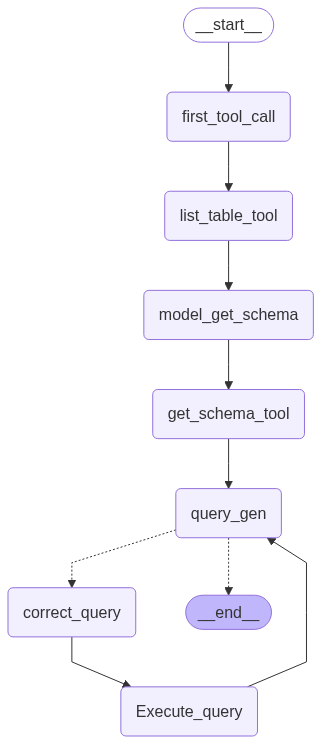

In [58]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

display(Image(
    app.get_graph().draw_mermaid_png(
        draw_method=MermaidDrawMethod.API
    )))

In [74]:
query = {"messages": [('user', 'email id of all employees with salary less than 65000')]}

In [75]:
response = app.invoke(query)

In [76]:
response['messages'][-1].tool_calls[0]["args"]["final_answer"]

'adarsh.cv@example.com, mithun.m@example.com'